We implement AlexNet from the original [paper](https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)

### Dataset
The goal is to train AlexNet on a subset of ImageNet ([ImageNet-100](https://www.kaggle.com/datasets/ambityga/imagenet100)). Images have high resolution and for our training, we used 224x224 images.

AlexNet achieved excellent performance in the 2012 ImageNet challenge. For high performance on very large dataset, larger model are needed and AlexNet made a significant a improvement over LeNet. Hardware improvements also made it successfull.

In [1]:
import numpy as np

import dataset

In [2]:
batch_size = 128

data = dataset.ImageNet100(batch_size=batch_size, normalize=False)
num_classes = data.num_classes

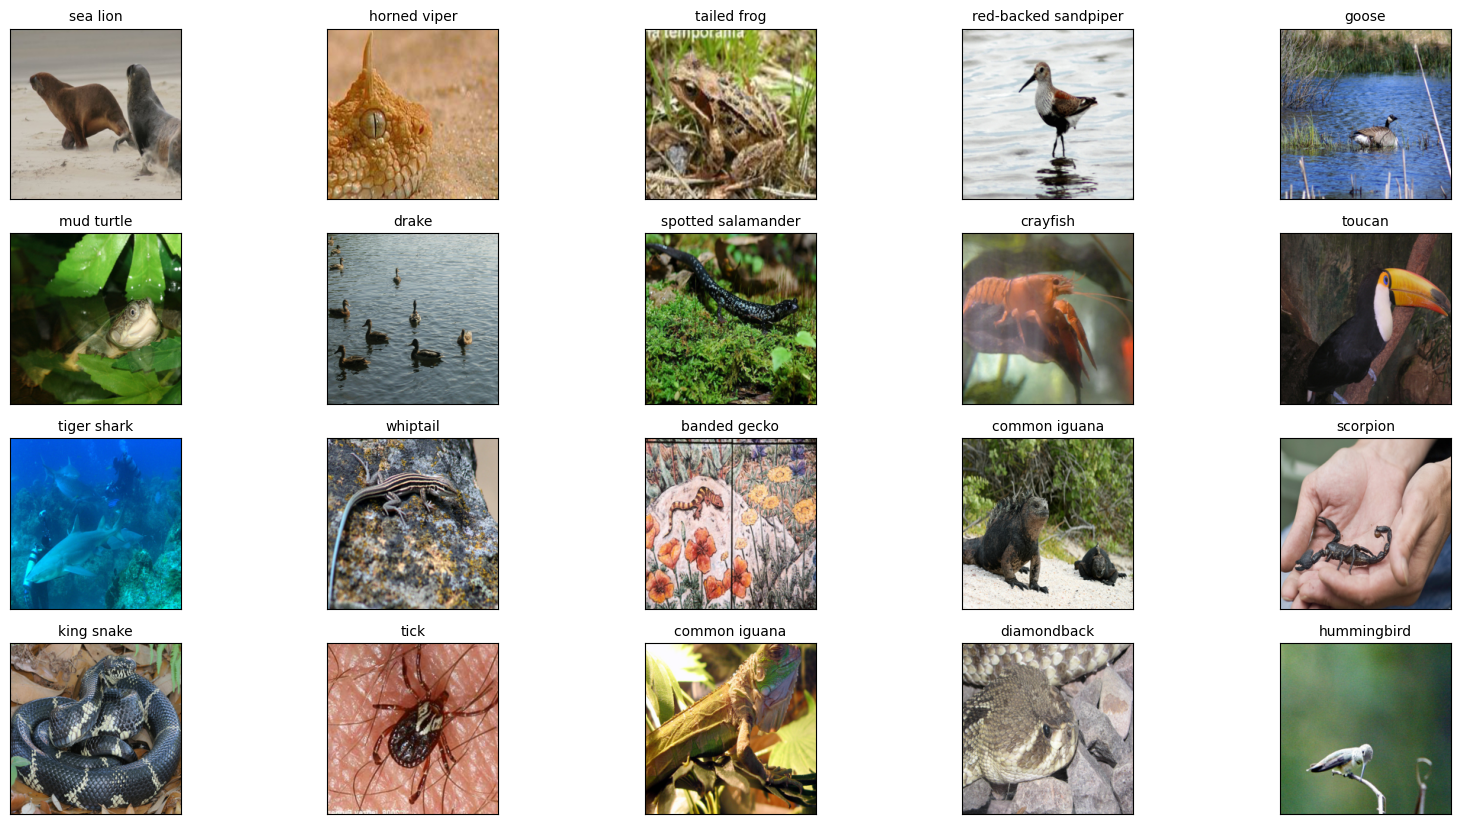

torch.Size([128, 3, 224, 224])


In [3]:
for batch in data.train_dataloader:
    x, y = batch
    labels = [data.labels_idx2str[yi] for yi in y.numpy()]
    data.show_images(x.permute(0,2,3,1)[:20], labels)
    print(x.shape); break

In [27]:
for v in data.labels.values():
    print(v[0])

chambered nautilus, pearly nautilus, nautilus
harvestman, daddy longlegs, Phalangium opilio
macaw
bittern
electric ray, crampfish, numbfish, torpedo
drake
agama
night snake, Hypsiglena torquata
indigo bunting, indigo finch, indigo bird, Passerina cyanea
tiger shark, Galeocerdo cuvieri
flamingo
garter snake, grass snake
common newt, Triturus vulgaris
tench, Tinca tinca
sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita
white stork, Ciconia ciconia
terrapin
diamondback, diamondback rattlesnake, Crotalus adamanteus
flatworm, platyhelminth
sea snake
spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish
green snake, grass snake
bald eagle, American eagle, Haliaeetus leucocephalus
kite
goldfish, Carassius auratus
scorpion
goose
bulbul
chickadee
sea anemone, anemone
magpie
mud turtle
crayfish, crawfish, crawdad, crawdaddy
lorikeet
garden spider, Aranea diademata
spoonbill
hermit crab
great white shark, white shark, man-eater, man-eating shark, Carcharodon carchari

### Model

In [5]:
import model

In [6]:
alex_net = model.AlexNet(num_classes=num_classes)
alex_net

AlexNet(
  (net): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2), bias=False)
    (1): ReLU()
    (2): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): ReLU()
    (6): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (9): ReLU()
    (10): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=9216, out_features=4096, bias=True

AlexNet is composed of eight learned layers: five convolutionnal layers and three fully-connected. The network architecture is given in the scheme below.

### Activation
AlexNet use ReLU as activation function in all the convolutional and fully-connected layers instead of Sigmoid.

$ReLU(x)=\max(x,0)$ is a saturating nonlinearity activation function and fast to compute. Plus the Sigmoid was prone to vanishing gradients.

In [7]:
num_total_params = 0
for _, params in alex_net.named_parameters():
    if params.requires_grad:
        num_total_params += params.numel()
num_total_params

58690564

The total number of parameters is: 58,690,564

### Local Response Normalization

AlexNet used local response normalization in order to help for generalization. Even if it is no longer used in modern architecures, the layer is applied after the ReLU and normalize across channels.

The response-normalized activity $b_{x,y}^i$ is given:

$$b_{x,y}^i = a_{x,y}^i \left(k + \alpha \sum_{j=\max(0, i-n/2)}^{\min(N-1,i+n/2)} (a_{x,y}^j)^2\right)^\beta$$

where:
- the sum runs over $n$ "adjacent" kernel maps at the same spatial position $(x,y)$
- $N$ is the total number of kernels in the layer
- the order of kernel maps is arbitrary
- the contants are: $k=2$, $n=5$, $\alpha=10^{-4}$ and $\beta=0.75$

This layer is effective as it helps to reduce the top-1 and top-5 errors

### Architecture

In [8]:
alex_net

AlexNet(
  (net): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2), bias=False)
    (1): ReLU()
    (2): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): ReLU()
    (6): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (9): ReLU()
    (10): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=9216, out_features=4096, bias=True

The two first convolutional layers are followed by local response normalization and max-pooling. ReLU activations were used for all convolutional and fully connected layers. Dropout is used in the first two fully-connected layers. It helps to fight againts overfitting and forces the network to learn more robust features.

Each learnable weight of the network is initialized with zero-mean Gaussian distribution with standard deviation of $0.01$. For biases, neurons in the 2nd, 4th and 5th convolutional layers and in fully-connected layers are initialized to $1$. For the rest, the initial bias is $0$.

### Training

Data augmentation was used. We used the first form presented in the paper. As the ImageNet-100 dataset have not fixed-size images, we reshaped the images to 2X6x256 and made random extraction of 224x224 patches. To finish, we enable a random horitontal flip of 0.5 probability.

For the training, the setup is:
- Optimizer: SGD + momentum of $0.9$
- Learning rate is initializd at $0.01$ and divided by $10$ when the valdiation loss stop improving. Weight decay of $0.0005$ is applied for regularization
- Loss: CrossEntropy
- Epochs: 90
- Batch size: 128 

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

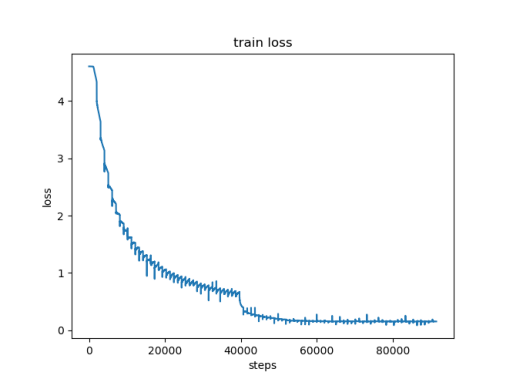

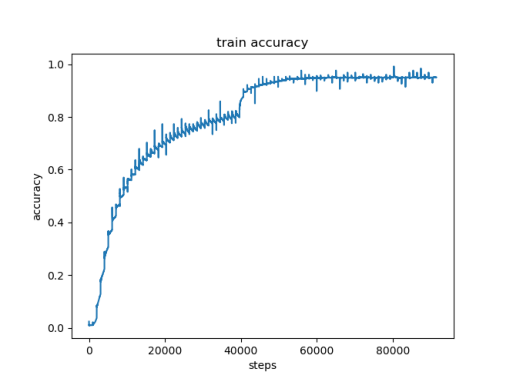

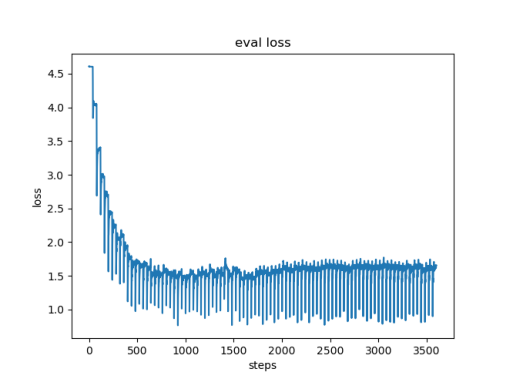

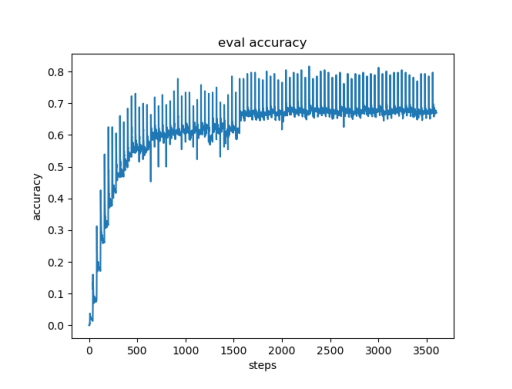

In [10]:
for set_name in ["train", "eval"]:
    for metric in ["loss", "accuracy"]:
        img = Image.open(f"{set_name}-{metric}.png")
        plt.imshow(img, cmap="gray")
        plt.axis("off")
        plt.show()

We used only accuracy as metrics because the dataset is balanced. We can see our model overfitted. We should have used the second form of data augmentation mentionned in the paper which tackles altering the intensities of the RGB channems in training images.

In [11]:
import torch
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

import dataset

We propose the confusion matrix on the validation dataset used during training.

In [12]:
batch_size = 128
data = dataset.ImageNet100(batch_size=batch_size)
num_classes = data.num_classes

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alex_net = torch.load("alexnet.pth").to(device)
alex_net.eval()

/tmp/ipykernel_139551/3397605177.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alex_net = torch.load("alexnet.pth").to(device)


AlexNet(
  (net): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2), bias=False)
    (1): ReLU()
    (2): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): ReLU()
    (6): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (9): ReLU()
    (10): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=9216, out_features=4096, bias=True

In [13]:
all_preds = []
all_true = []
for batch in data.eval_dataloader:
    batch = [a.to(device) for a in batch]
    with torch.no_grad():
        output = alex_net(*batch[:-1])
        pred = output.argmax(dim=-1).detach().cpu().numpy()
        all_preds.append(pred)
        all_true.append(batch[-1].detach().cpu().numpy())

eval_cm = confusion_matrix(y_true=np.concatenate(all_true), y_pred=np.concatenate(all_preds))

<Axes: >

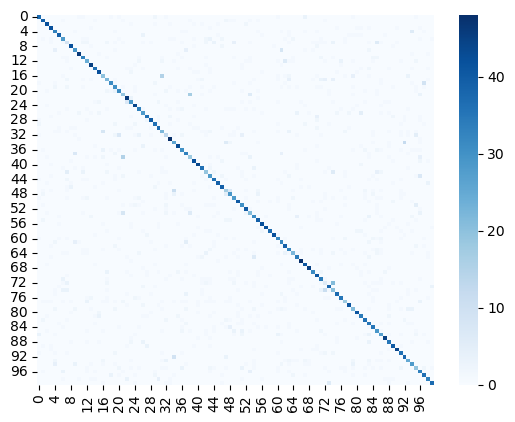

In [14]:
sns.heatmap(eval_cm, cmap="Blues")

In [15]:
eval_cm[:10, :10]

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 33,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0, 28,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  1,  9,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 42,  0],
       [ 0,  0,  0,  0,  4,  0,  0,  0,  0, 29]])

In [16]:
import os

In [17]:
test_set = [np.array(Image.open(path).convert("RGB")) for path in os.scandir("test-set")]

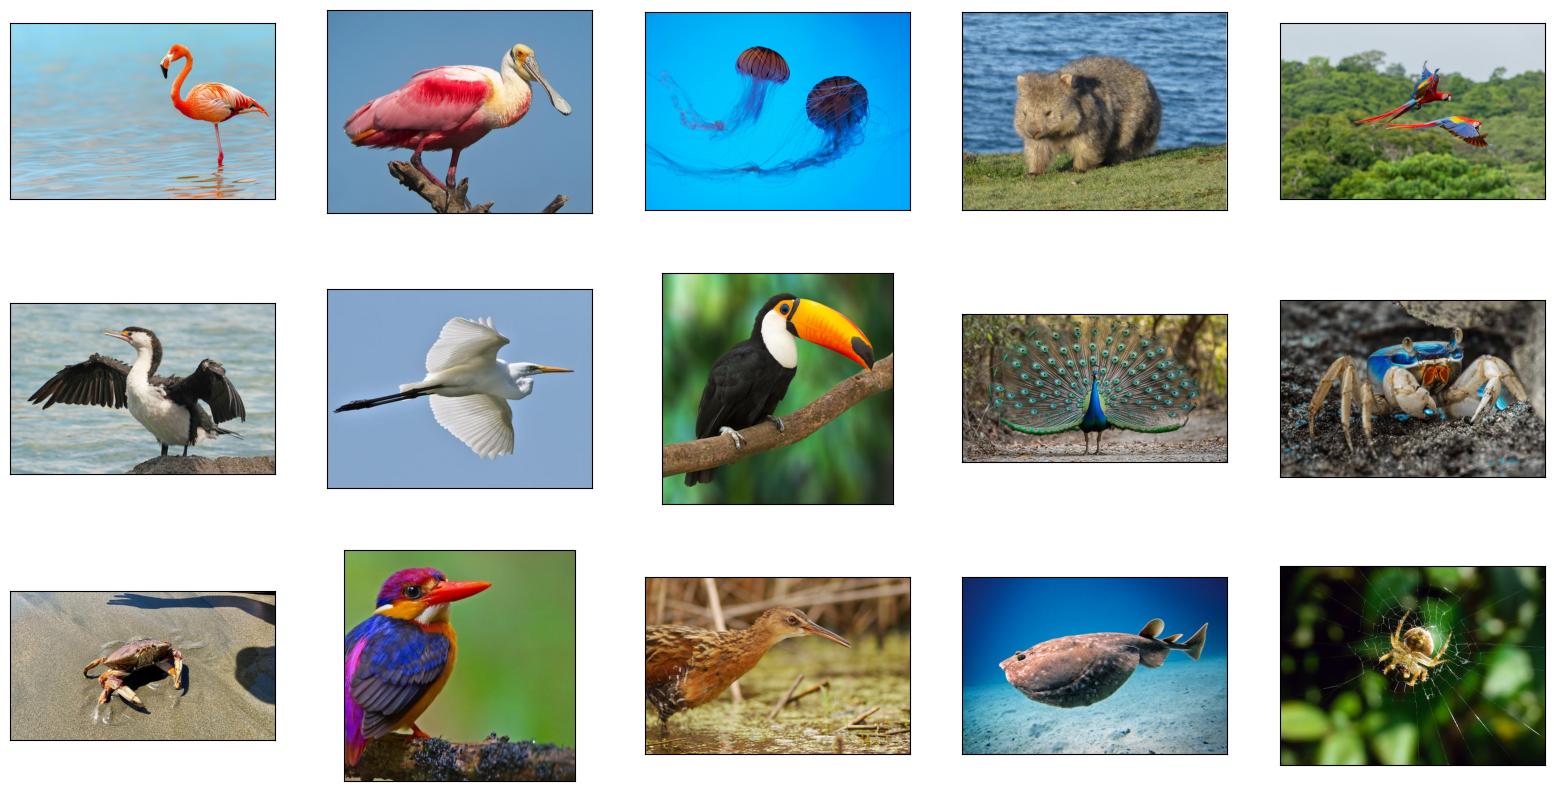

In [19]:
fig, axes = plt.subplots(3, 5, figsize=(19.8,10.2))
axes = axes.ravel()
for i in range(len(axes)):
    axes[i].imshow(test_set[i], cmap="gray")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.show()

In [20]:
import inference

In [21]:
preds = []
for im in test_set:
    pred = inference.predict(alex_net, torch.tensor(im, dtype=torch.float32).permute(2,0,1) / 255., device=device)
    preds.append(pred)

In [22]:
np.argsort(preds[6][1])

array([84, 31, 29, 17, 43, 20, 36, 74, 21, 72, 91, 54, 12, 62,  7, 41, 11,
       38, 16, 63, 42, 77, 76, 25, 34, 95,  0, 55, 51,  1, 97, 67, 44, 33,
       52, 93, 24, 47, 48,  6, 79, 71, 85, 18, 32, 53, 19, 92, 64, 82, 45,
       96, 66, 94, 73, 13, 68, 49, 60, 78, 99, 57,  4,  2,  8, 90, 65, 56,
       89, 87, 46, 50,  9,  5, 30, 83, 22, 98, 10, 80, 86, 27,  3, 37, 39,
       59, 70, 61, 58, 40, 28, 15, 69, 26, 88, 23, 14, 75, 81, 35])

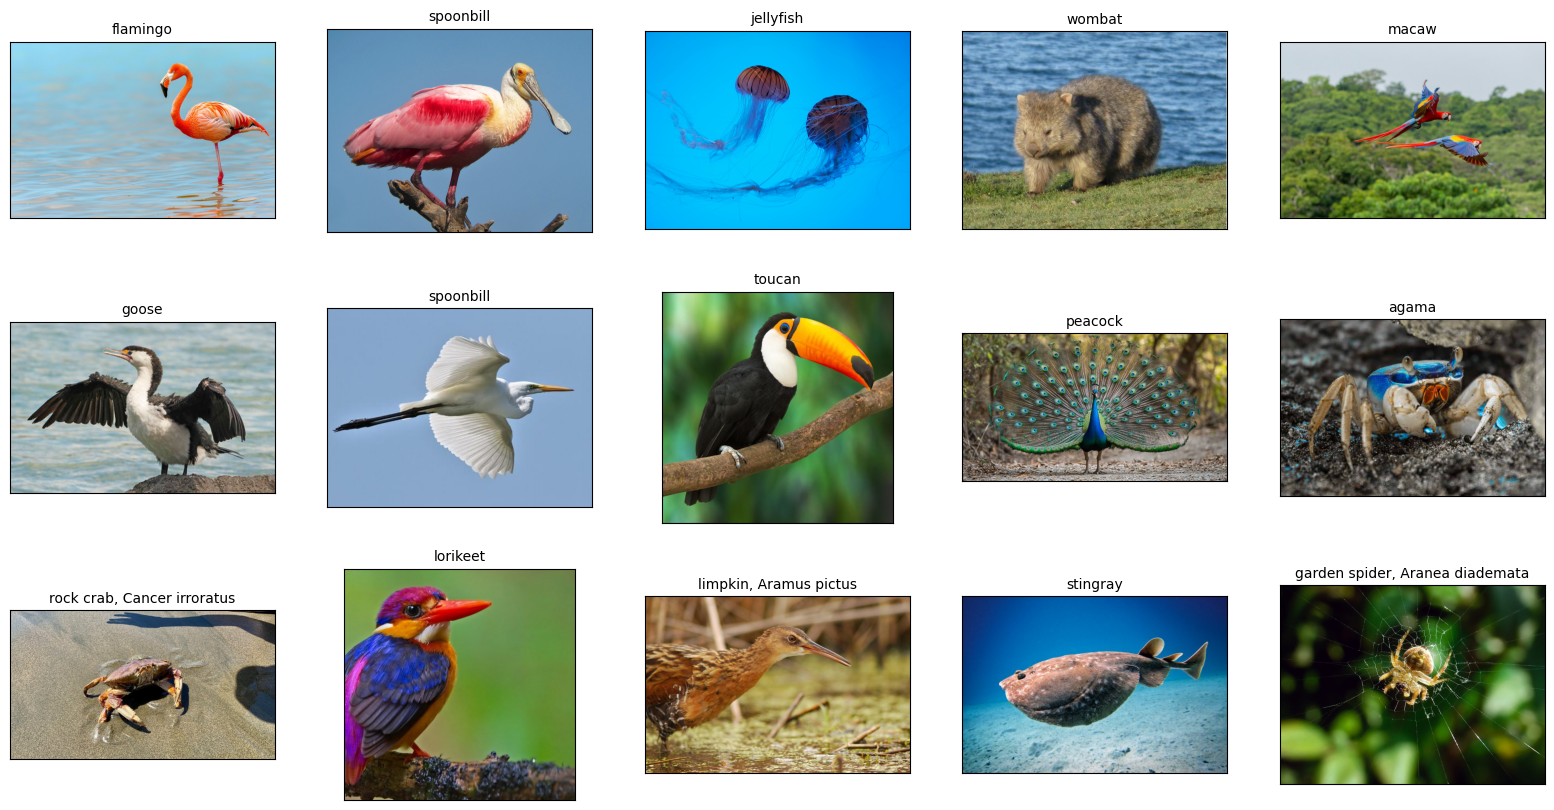

In [23]:
labels = [data.labels_idx2str[p[0]] for p in preds]

fig, axes = plt.subplots(3, 5, figsize=(19.8,10.2))
axes = axes.ravel()
for i in range(len(axes)):
    axes[i].imshow(test_set[i], cmap="gray")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(labels[i], fontsize=10)
plt.show()

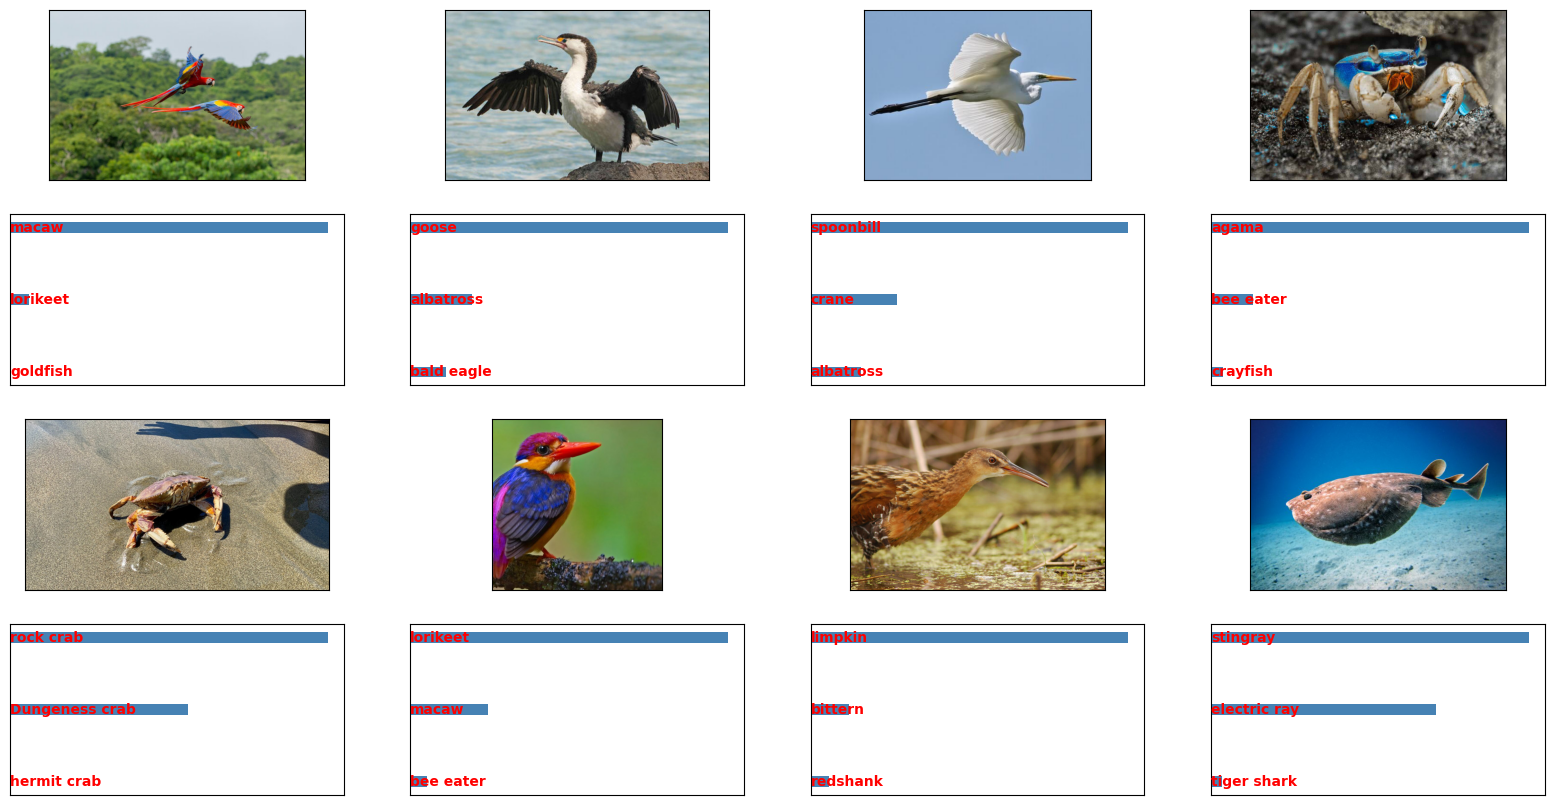

In [24]:
other_plosible_preds = [4, 5, 6, 9, 10, 11, 12, 13] # choosed in purpose of having other possible labels

fig, axes = plt.subplots(4, 4, figsize=(19.8,10.2))
for idx, i in enumerate(other_plosible_preds):
    pred = preds[i]
    axes[idx//4*2, idx%4].imshow(test_set[i], cmap="gray")

    top3 = np.argsort(pred[1])[-3:]
    top3 = [(data.labels_idx2str[i], pred[1][i]) for i in top3]
    labels = [x[0] for x in top3]
    values = [x[1] for x in top3]
    axes[idx//4*2+1, idx%4].barh(labels, values, height=0.15, color='steelblue')
    for i, (value, label) in enumerate(zip(values, labels)):
        axes[idx//4*2+1, idx%4].text(0, i, label.split(",")[0], 
                color='red', va='center', ha="left", fontsize=10, weight='bold')
    axes[idx//4*2+1, idx%4].set_xticks([])
    axes[idx//4*2+1, idx%4].set_yticks([])
    axes[idx//4*2, idx%4].set_xticks([])
    axes[idx//4*2, idx%4].set_yticks([])
plt.show()

We can see for example "macaw" being the second most probable prediction in the case of lorikeet and inversely